In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

In [6]:
gfw = GravityFramework.GravityFramework()

### Load Einstein

In [7]:
foldername = r'/data/new_trap/20200210/Bead2/Discharge/'
bdf_discharge = load_dir(dirname=foldername)

57  files in folder
57  files loaded


In [8]:
bb = bdf_discharge[0]
response_z = [np.std(bb.response_at_freq('z',drive_freq=151)) for bb in bdf_discharge]
response_x = [np.std(bb.response_at_freq('x',drive_freq=151)) for bb in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [9]:
bdf_z = bdf_discharge[40:46]
bdf_x = bdf_discharge[14:19]
m1s_z = gfw.build_z_response(bdf_z, drive_freq=151,charges=3, bandwidth=2, decimate=100, include_sigma=True)
m1s_x = gfw.build_x_response(bdf_x, drive_freq=151,charges=17, bandwidth=2)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
Z2-amplitude:  1.06e+03
reduced chi2:  7.804653856156323
***************************************************
Z2-amplitude:  1.05e+03
reduced chi2:  7.428520404699444
***************************************************
Z2-amplitude:  1.04e+03
reduced chi2:  7.476885055525826
***************************************************
Z2-amplitude:  1.04e+03
reduced chi2:  7.478576400031851
***************************************************
Z2-amplitude:  1.04e+03
reduced chi2:  7.507181811455073
***************************************************
Z2-amplitude:  1.05e+03
reduced chi2:  7.5682824195810685
Z2 response (amplitude): 1046.7015015293352
***************************************************
X2-amplitude:  9.26e+01
reduced chi2:  5.837537534957842
***************************************************
X2-amplitude:  9.39e+01
reduced chi2:  6.264163544256005
***************************************************
X2-amplitude:  9.38e+01
reduced

In [10]:
fname = r'/data/new_trap/20200210/Bead2/TransFunc/TransFunc_X_3.h5'
tf_x = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200210/Bead2/TransFunc/TransFunc_Y_3.h5'
tf_y = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200210/Bead2/TransFunc/TransFunc_Z_3.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)
tf_list = [tf_x, tf_y, tf_z]
gfw.build_transfer_function(tf_list, plot=False)

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


In [16]:
fname = r'/data/new_trap/20191215/Bead1/TransFunc/TransFuncX_0.h5'
tf_x = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20191215/Bead1/TransFunc/TransFuncY_0.h5'
tf_y = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20191215/Bead1/TransFunc/TransFuncZ_0.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)
tf_list = [tf_x, tf_y, tf_z]

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


<IPython.core.display.Javascript object>


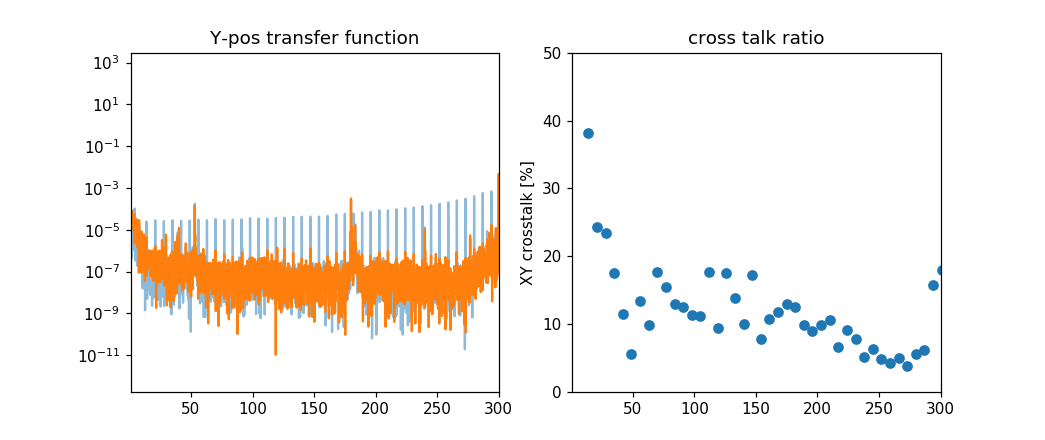

[(0, 50), Text(0, 0.5, 'XY crosstalk [%]'), Text(0.5, 1.0, 'cross talk ratio')]

In [18]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
freq, psd_tx = tf_x.psd2('y')
freq, psd_tz = tf_y.psd2('y')
ax[0].semilogy(freq, psd_tz, alpha=0.5)
ax[0].semilogy(freq, psd_tx)

fff = []
ratio = []
for ff,tx,tz in zip(freq,psd_tx,psd_tz):
    if ff%7==0:
        fff.append(ff)
        ratio.append(np.sqrt(tx/tz)*100)
ax[1].scatter(fff,ratio)
ax[0].set(xlim=(1,300),title='Y-pos transfer function')
ax[1].set(ylim=(0,50), title='cross talk ratio', ylabel='XY crosstalk [%]')

<IPython.core.display.Javascript object>


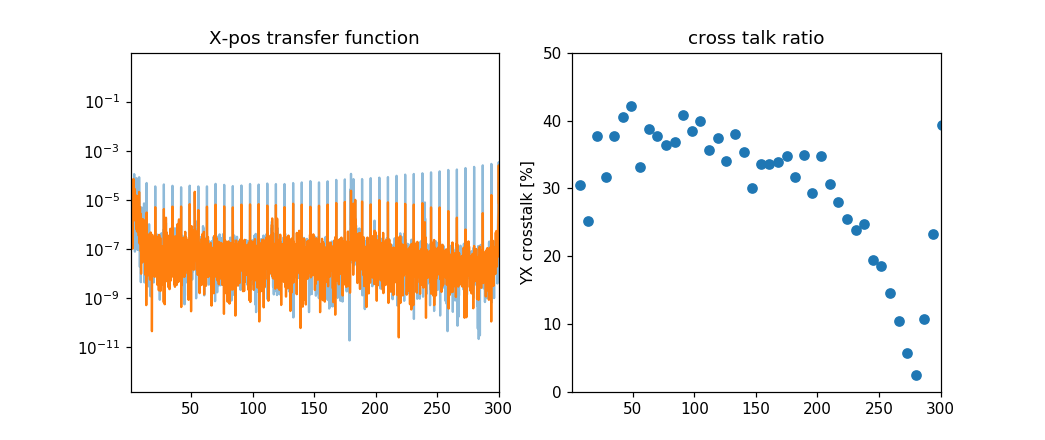

[(0, 50), Text(0, 0.5, 'YX crosstalk [%]'), Text(0.5, 1.0, 'cross talk ratio')]

In [19]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
freq, psd_tx = tf_y.psd2('x')
freq, psd_tz = tf_x.psd2('x')
ax[0].semilogy(freq, psd_tz, alpha=0.5)
ax[0].semilogy(freq, psd_tx)

fff = []
ratio = []
for ff,tx,tz in zip(freq,psd_tx,psd_tz):
    if ff%7==0:
        fff.append(ff)
        ratio.append(np.sqrt(tx/tz)*100)
ax[1].scatter(fff,ratio)
ax[0].set(xlim=(1,300),title='X-pos transfer function')
ax[1].set(ylim=(0,50), title='cross talk ratio', ylabel='YX crosstalk [%]')

<IPython.core.display.Javascript object>


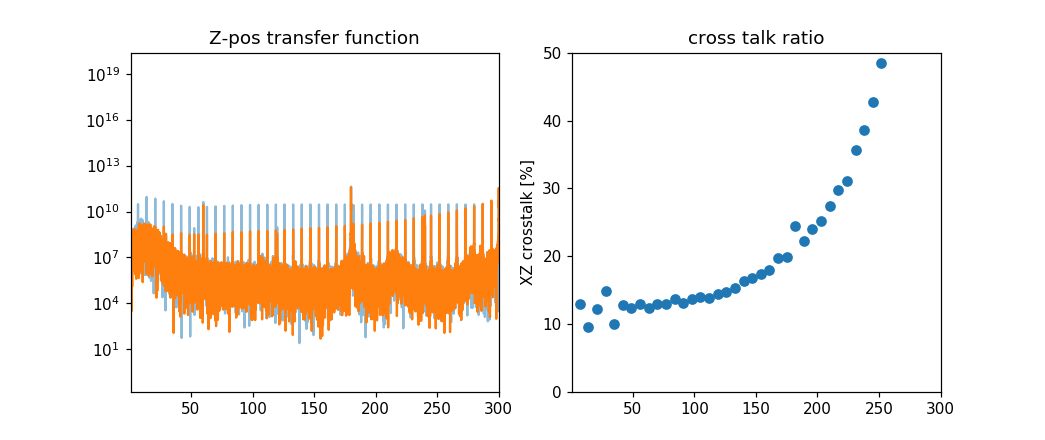

[(0, 50), Text(0, 0.5, 'XZ crosstalk [%]'), Text(0.5, 1.0, 'cross talk ratio')]

In [14]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
freq, psd_tx = tf_x.psd2('z')
freq, psd_tz = tf_z.psd2('z')
ax[0].semilogy(freq, psd_tz, alpha=0.5)
ax[0].semilogy(freq, psd_tx)

fff = []
ratio = []
for ff,tx,tz in zip(freq,psd_tx,psd_tz):
    if ff%7==0:
        fff.append(ff)
        ratio.append(np.sqrt(tx/tz)*100)
ax[1].scatter(fff,ratio)
ax[0].set(xlim=(1,300),title='Z-pos transfer function')
ax[1].set(ylim=(0,50), title='cross talk ratio', ylabel='XZ crosstalk [%]')

In [82]:
m1s_z5 = gfw.build_z_response(bdf_z, drive_freq=151,charges=3, bandwidth=2, decimate=100, include_sigma=True)

***************************************************
Z2-amplitude:  1.06e+03
reduced chi2:  7.804653856156323
***************************************************
Z2-amplitude:  1.05e+03
reduced chi2:  7.428520404699444
***************************************************
Z2-amplitude:  1.04e+03
reduced chi2:  7.476885055525826
***************************************************
Z2-amplitude:  1.04e+03
reduced chi2:  7.478576400031851
***************************************************
Z2-amplitude:  1.04e+03
reduced chi2:  7.507181811455073
***************************************************
Z2-amplitude:  1.05e+03
reduced chi2:  7.5682824195810685
Z2 response (amplitude): 1046.7015015293352


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [83]:
foldername = r'/data/new_trap/20200210/Bead2/Shaking/Shaking384/'
datasets_num = 1000
data_bdfs = load_dir(foldername, file_prefix='Shaking7', start_file=2000, max_file=datasets_num)

5000  files in folder
1000  files loaded


<IPython.core.display.Javascript object>


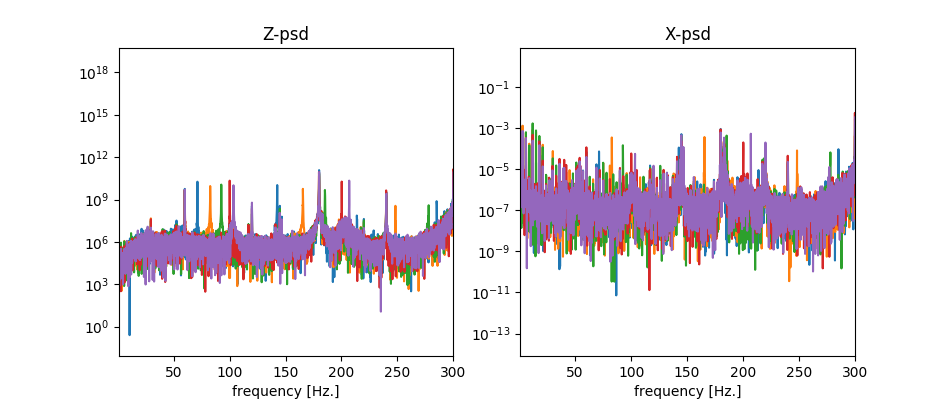

[(1, 300), Text(0.5, 0, 'frequency [Hz.]'), Text(0.5, 1.0, 'X-psd')]

In [84]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
for i,bb in enumerate(data_bdfs[500::100]):
    ax[0].semilogy(*bb.psd2('z'))
ax[0].set(xlim=(1,300),xlabel='frequency [Hz.]', title='Z-psd')

for i,bb in enumerate(data_bdfs[500::100]):
    ax[1].semilogy(*bb.psd2('x'),)
ax[1].set(xlim=(1,300),xlabel='frequency [Hz.]', title='X-psd')

In [85]:
gfw.BDFs = data_bdfs
gfw.build_noise_array(sideband_freq=20, bandwidth=2)
gfw.build_noise_array_z(sideband_freq=20, bandwidth=2)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  278.1174609709516
x3 noise rms:  7507.527929153012
z2 noise level:  373904.3144496138  std:  903130.3756317534


In [89]:
fit_kwargs2 = {'alpha': 0, 'phase': 0, 'sigma': 17, 'error_alpha': 0.01, 'error_phase': 1, 'error_sigma': 1,
              'errordef': 1,
              'limit_alpha': [-100, 100], 'limit_phase': [-5,5], 'limit_sigma': [0,100],
              'fix_alpha': False, 'fix_phase': False, 'fix_sigma': False, 'print_level': 0}
min_18_x = []
datasets_num = 1000
bandwidth = 2
center_freq = 18
for i,bb in enumerate(gfw.BDFs):
    print(i,'/',datasets_num) 
    min_18_x.append(gfw.get_alpha_mle_pl(bdf=bb, center_freq=center_freq, noise_freq=center_freq+bandwidth, 
                                             bandwidth=bandwidth, decimate=100, direction1='x',
                          x_focous=394.5, frequency=3, lambda_par=0.0001, height=6e-6, suppress_print=False,
                          **fit_kwargs2)[2])

0 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  5.24e-02
sigma mle:  1.74e+00
reduced chi2:  0.03381093541475883
1 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  7.92e-02
sigma mle:  1.71e+00
reduced chi2:  0.032024178382789883
2 / 1000
Separation (face to face

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  9.83e-01
sigma mle:  1.00e+02
reduced chi2:  0.20668043186970497
6 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.10e-01
sigma mle:  2.32e+00
reduced chi2:  0.04297934910991054
7 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not exist

***************************************************
alpha mle:  1.01e-01
sigma mle:  3.18e+00
reduced chi2:  0.052994406451423316
24 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  5.34e-02
sigma mle:  3.34e+00
reduced chi2:  0.05460745711044025
25 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

***************************************************
alpha mle:  1.96e-01
sigma mle:  1.89e+00
reduced chi2:  0.03634048135343172
41 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.42e-01
sigma mle:  1.77e+00
reduced chi2:  0.03753717629107308
42 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
********************************

***************************************************
alpha mle:  2.05e-01
sigma mle:  1.77e+00
reduced chi2:  0.034324125267392425
59 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.06e-01
sigma mle:  1.76e+00
reduced chi2:  0.034064790415930336
60 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  -2.15e+00
sigma mle:  1.00e+02
reduced chi2:  0.2671692092278153
78 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -8.28e+01
sigma mle:  1.00e+02
reduced chi2:  27449.690195219373
79 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
********************************

***************************************************
alpha mle:  8.55e-02
sigma mle:  1.67e+00
reduced chi2:  0.03233491160196864
99 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  8.63e-02
sigma mle:  1.86e+00
reduced chi2:  0.03578023427436152
100 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

***************************************************
alpha mle:  2.39e-01
sigma mle:  1.54e+00
reduced chi2:  0.029789134913930378
117 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.31e-01
sigma mle:  1.54e+00
reduced chi2:  0.029781636607089053
118 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  2.34e-01
sigma mle:  1.48e+00
reduced chi2:  0.02861126766298089
134 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.47e-01
sigma mle:  1.58e+00
reduced chi2:  0.030536334737016706
135 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  2.18e-01
sigma mle:  1.67e+00
reduced chi2:  0.03240246650190437
151 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.19e-01
sigma mle:  1.67e+00
reduced chi2:  0.03250573327601729
152 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  2.18e-01
sigma mle:  1.64e+00
reduced chi2:  0.03181381026575765
169 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.06e-01
sigma mle:  1.76e+00
reduced chi2:  0.034115825198254734
170 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  1.26e-01
sigma mle:  1.85e+00
reduced chi2:  0.035714034728066994
187 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  9.99e-02
sigma mle:  1.80e+00
reduced chi2:  0.034834514631159635
188 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  2.39e-01
sigma mle:  1.55e+00
reduced chi2:  0.029935968785239363
206 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.52e-01
sigma mle:  1.65e+00
reduced chi2:  0.032037917831512705
207 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  2.57e-01
sigma mle:  1.64e+00
reduced chi2:  0.03180872634465506
227 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.98e-01
sigma mle:  1.99e+00
reduced chi2:  0.03544612096156507
228 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.31e-01
sigma mle:  1.58e+00
reduced chi2:  0.030632959649418676
248 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.80e+00
sigma mle:  1.00e+02
reduced chi2:  0.2648308778160269
249 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not e

***************************************************
alpha mle:  1.03e-01
sigma mle:  1.39e+00
reduced chi2:  0.026575112328532113
265 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.12e-01
sigma mle:  1.40e+00
reduced chi2:  0.02687060706460317
266 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  2.59e-01
sigma mle:  1.63e+00
reduced chi2:  0.03170441887301064
284 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.76e-01
sigma mle:  1.38e+00
reduced chi2:  0.026268103290313986
285 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  2.29e-01
sigma mle:  1.62e+00
reduced chi2:  0.031454020928907395
302 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.36e-01
sigma mle:  1.64e+00
reduced chi2:  0.031824087388790605
303 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  2.78e-01
sigma mle:  1.38e+00
reduced chi2:  0.026307224855139224
320 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.94e-01
sigma mle:  1.42e+00
reduced chi2:  0.027138248682018327
321 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  1.40e-01
sigma mle:  1.71e+00
reduced chi2:  0.03311347584458905
338 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.12e-01
sigma mle:  1.67e+00
reduced chi2:  0.032358976361147006
339 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  1.14e-01
sigma mle:  1.40e+00
reduced chi2:  0.02680670222614139
358 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.43e-01
sigma mle:  1.56e+00
reduced chi2:  0.030191838804779783
359 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

375 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.94e-01
sigma mle:  1.20e+00
reduced chi2:  0.021964925570340642
376 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.51e-01
sigma mle:  1.07e+00
reduced chi2:  0.01817225342901948
377 / 1000
Separation (face t

***************************************************
alpha mle:  2.91e-01
sigma mle:  1.39e+00
reduced chi2:  0.026652865372152813
395 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.81e-01
sigma mle:  1.41e+00
reduced chi2:  0.027082356752925925
396 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  2.60e-01
sigma mle:  1.35e+00
reduced chi2:  0.02566713499628617
412 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.54e-01
sigma mle:  1.29e+00
reduced chi2:  0.024041594217081012
413 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  2.15e-01
sigma mle:  1.62e+00
reduced chi2:  0.03136908482931597
433 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.94e-01
sigma mle:  1.64e+00
reduced chi2:  0.03177369235898215
434 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  2.67e-01
sigma mle:  1.47e+00
reduced chi2:  0.028400893420335627
451 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.69e-01
sigma mle:  1.49e+00
reduced chi2:  0.028848026658420966
452 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  2.36e-01
sigma mle:  1.13e+00
reduced chi2:  0.01987883435035066
468 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.67e-01
sigma mle:  1.17e+00
reduced chi2:  0.020532251993141692
469 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  1.08e-01
sigma mle:  8.76e-01
reduced chi2:  0.01175307361555658
488 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.90e+00
sigma mle:  1.00e+02
reduced chi2:  0.28962098460627544
489 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -1.77e-01
sigma mle:  1.05e+01
reduced chi2:  0.09136597334027188
506 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.98e-01
sigma mle:  1.06e+00
reduced chi2:  0.017777097898983792
507 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  2.03e-01
sigma mle:  1.65e+00
reduced chi2:  0.0319580577493302
523 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -2.87e+00
sigma mle:  1.00e+02
reduced chi2:  0.32258008940906846
524 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  3.18e-01
sigma mle:  1.12e+00
reduced chi2:  0.019292647383985263
543 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.05e-01
sigma mle:  1.13e+00
reduced chi2:  0.01994633466052553
544 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  3.27e-01
sigma mle:  1.16e+00
reduced chi2:  0.020859353242166482
563 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.13e-01
sigma mle:  1.19e+00
reduced chi2:  0.02154053355447112
564 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  2.54e-01
sigma mle:  1.06e+00
reduced chi2:  0.01800368021897743
580 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.56e-01
sigma mle:  1.08e+00
reduced chi2:  0.018364203973008558
581 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -8.48e-01
sigma mle:  1.00e+02
reduced chi2:  0.17775846883791072
600 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.75e-01
sigma mle:  1.45e+00
reduced chi2:  0.027970766639366474
601 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  -3.55e+00
sigma mle:  1.00e+02
reduced chi2:  0.26535501597666084
619 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.65e+00
sigma mle:  1.00e+02
reduced chi2:  0.2675193309768905
620 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  3.33e-01
sigma mle:  1.23e+00
reduced chi2:  0.022720924360384625
639 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.37e-01
sigma mle:  1.18e+00
reduced chi2:  0.021396566730507924
640 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  2.41e-01
sigma mle:  8.74e-01
reduced chi2:  0.010738503038374734
658 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.39e-01
sigma mle:  8.89e-01
reduced chi2:  0.01434284317571738
659 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  2.93e-01
sigma mle:  1.11e+00
reduced chi2:  0.019314776310630843
675 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.10e-01
sigma mle:  1.16e+00
reduced chi2:  0.020776480130889383
676 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  8.54e+00
sigma mle:  1.00e+02
reduced chi2:  0.7314852311636753
692 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.73e+00
sigma mle:  9.95e+01
reduced chi2:  0.17938604797225227
693 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  3.44e-01
sigma mle:  1.06e+00
reduced chi2:  0.017908798978052393
709 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.42e-01
sigma mle:  1.14e+00
reduced chi2:  0.020324016655452196
710 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  3.02e-01
sigma mle:  9.38e-01
reduced chi2:  0.013945777160403383
726 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.21e-01
sigma mle:  1.03e+00
reduced chi2:  0.016968201040446843
727 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  1.49e-01
sigma mle:  8.10e-01
reduced chi2:  0.009235087604964935
743 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.37e-01
sigma mle:  8.00e-01
reduced chi2:  0.008854915496939418
744 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  1.19e-01
sigma mle:  7.83e-01
reduced chi2:  0.008153843699224748
761 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.17e-01
sigma mle:  8.52e-01
reduced chi2:  0.010340296991293662
762 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  2.83e+00
sigma mle:  1.00e+02
reduced chi2:  0.2658592846598195
779 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.20e+00
sigma mle:  1.00e+02
reduced chi2:  0.1802817171777101
780 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

***************************************************
alpha mle:  3.41e-01
sigma mle:  1.20e+00
reduced chi2:  0.021815611366860315
797 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.31e-01
sigma mle:  9.85e-01
reduced chi2:  0.015504952324170016
798 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  1.46e-01
sigma mle:  7.40e-01
reduced chi2:  0.006180701861124985
817 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.64e-01
sigma mle:  8.39e-01
reduced chi2:  0.01039060988191284
818 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  4.76e+00
sigma mle:  1.00e+02
reduced chi2:  0.30968021228731324
836 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.30e-01
sigma mle:  8.57e-01
reduced chi2:  0.011011593243506665
837 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  2.54e-01
sigma mle:  9.77e-01
reduced chi2:  0.015246986452405601
855 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.93e-01
sigma mle:  1.07e+00
reduced chi2:  0.018153380900515582
856 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  3.26e-01
sigma mle:  1.25e+00
reduced chi2:  0.02311413220754873
873 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.39e-01
sigma mle:  1.17e+00
reduced chi2:  0.020922661065192187
874 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  1.76e-01
sigma mle:  7.86e-01
reduced chi2:  0.00826043963956154
891 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.03e-01
sigma mle:  6.79e-01
reduced chi2:  0.003619051048757833
892 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  2.77e-01
sigma mle:  9.43e-01
reduced chi2:  0.014109664418213765
909 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.82e-01
sigma mle:  8.87e-01
reduced chi2:  0.012683491419841394
910 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  1.39e-01
sigma mle:  8.66e-01
reduced chi2:  0.011316117471086486
926 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.59e-01
sigma mle:  7.88e-01
reduced chi2:  0.008370697440661249
927 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  3.32e-01
sigma mle:  1.12e+00
reduced chi2:  0.01928850837283528
944 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.24e-01
sigma mle:  1.23e+00
reduced chi2:  0.022503051760342493
945 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  3.87e+00
sigma mle:  1.00e+02
reduced chi2:  0.2591004191538744
962 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.64e-01
sigma mle:  9.96e-01
reduced chi2:  0.015866160432547054
963 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  1.34e-01
sigma mle:  8.17e-01
reduced chi2:  0.009542779886171436
980 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.79e-01
sigma mle:  6.45e-01
reduced chi2:  0.005903042732037227
981 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  1.56e-01
sigma mle:  8.47e-01
reduced chi2:  0.00563551277881725
999 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.25e-01
sigma mle:  1.23e+00
reduced chi2:  0.012998631807060047


In [90]:
m_18_alpha = [m1_.values[0] for m1_ in min_18_z]
m_18_sigma = [m1_.values[2] for m1_ in min_18_z]

m_18_alpha_x = [m1_.values[0] for m1_ in min_18_x]
m_18_sigma_x = [m1_.values[2] for m1_ in min_18_x]

# m_6_alpha = [m1_.values[0] for m1_ in min_6_z]
# m_6_sigma = [m1_.values[2] for m1_ in min_6_z]

# m_6_alpha_x = [m1_.values[0] for m1_ in min_6_x]
# m_6_sigma_x = [m1_.values[2] for m1_ in min_6_x]

<IPython.core.display.Javascript object>


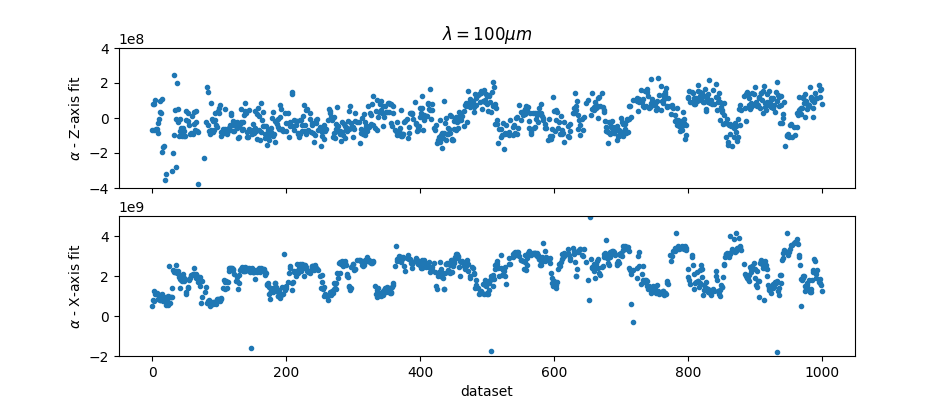

[(-2000000000.0, 5000000000.0)]

In [102]:
_, ax = plt.subplots(2,1,figsize=(9.5,4), sharex=True)
ax[0].plot(range(len(m_18_alpha)),np.array(m_18_alpha)*1e10,'.')
ax[1].plot(range(len(m_18_alpha)),np.array(m_18_alpha_x)*1e10,'.')

# ax.plot(range(len(m_18_alpha)),np.array(m_6_alpha),'.')
# ax.plot(range(len(m_18_alpha)),np.array(m_6_alpha_x-np.mean(m_6_alpha_x))/10,'.')

ax[1].set(xlabel='dataset', ylabel=r'$\alpha$ - X-axis fit')
ax[0].set(ylabel=r'$\alpha$ - Z-axis fit', title=r'$\lambda=100 \mu m $')
ax[0].set(ylim=(-4e8,4e8))
ax[1].set(ylim=(-2e9,5e9))

### TF at different hieghts

In [13]:
fname = r'/data/new_trap/20200110/Bead2/TransFunc/TransFunc_X_'
bdfs_x = [BeadDataFile.BeadDataFile(fname+str(i)+'.h5') for i in range(1,17,3)]

fname = r'/data/new_trap/20200110/Bead2/TransFunc/TransFunc_Z_'
bdfs_z = [BeadDataFile.BeadDataFile(fname+str(i)+'.h5') for i in range(3,19,3)]

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


<IPython.core.display.Javascript object>


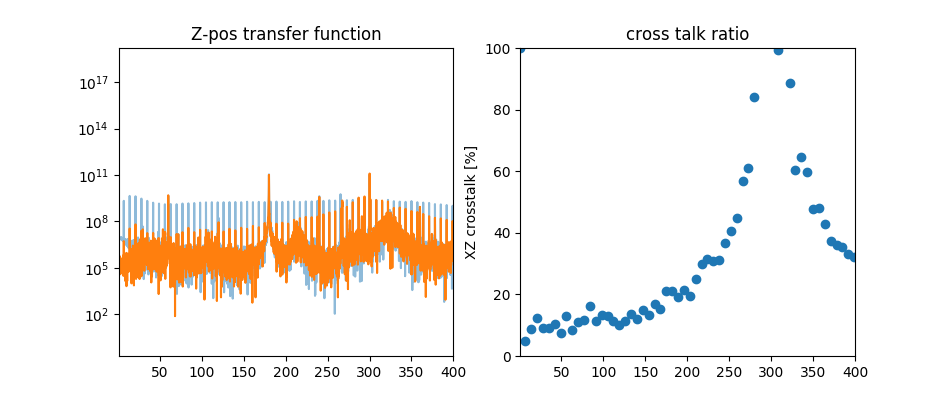

[(0, 100),
 Text(0, 0.5, 'XZ crosstalk [%]'),
 Text(0.5, 1.0, 'cross talk ratio')]

In [108]:
i = 5
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
freq, psd_tx = bdfs_x[i].psd2('z')
freq, psd_tz = bdfs_z[i].psd2('z')
ax[0].semilogy(freq, psd_tz, alpha=0.5)
ax[0].semilogy(freq, psd_tx)

fff = []
ratio = []
for ff,tx,tz in zip(freq,psd_tx,psd_tz):
    if ff%7==0:
        fff.append(ff)
        ratio.append(np.sqrt(tx/tz)*100)
ax[1].scatter(fff,ratio)
ax[0].set(xlim=(1,400),title='Z-pos transfer function')
ax[1].set(ylim=(0,100), title='cross talk ratio', ylabel='XZ crosstalk [%]')

<IPython.core.display.Javascript object>


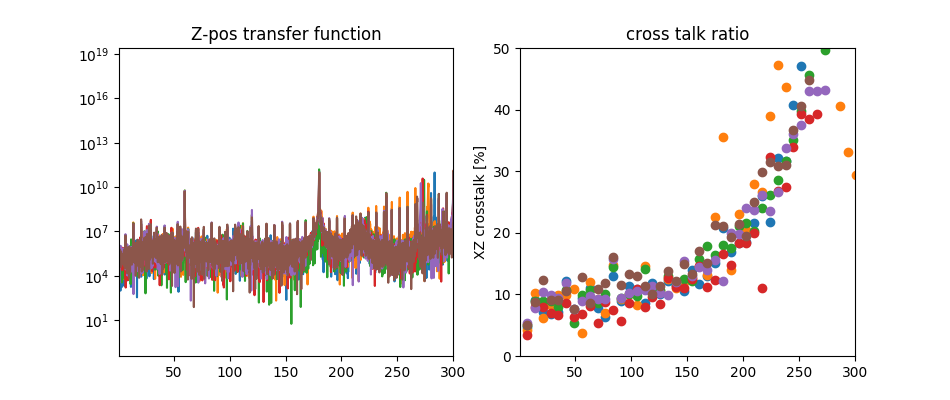

In [15]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True)
for i in range(0,6):
    freq, psd_tx = bdfs_x[i].psd2('z')
    freq, psd_tz = bdfs_z[i].psd2('z')
#     ax[0].semilogy(freq, psd_tz, alpha=0.5)
    ax[0].semilogy(freq, psd_tx)

    fff = []
    ratio = []
    for ff,tx,tz in zip(freq,psd_tx,psd_tz):
        if (ff%7==0):
            fff.append(ff)
            ratio.append(np.sqrt(tx/tz)*100)
    ax[1].scatter(fff,ratio)
    ax[0].set(xlim=(1,300),title='Z-pos transfer function')
    ax[1].set(ylim=(0,50), title='cross talk ratio', ylabel='XZ crosstalk [%]')

In [141]:
center_freq = 21
bandwidth = 2
decimate=10
fsamp = 5000
b, a = signal.butter(3, [2. * (center_freq - bandwidth / 2.) / fsamp,
                         2. * (center_freq + bandwidth / 2.) / fsamp], btype='bandpass')
i=2
x = bdfs_x[i].z2
data_z = signal.filtfilt(b, a, x)[5000:-5000:decimate]  # x2 data - QPD carrier amplitude
x = bdfs_z[i].z2
cal_z = signal.filtfilt(b, a, x)[5000:-5000:decimate]  # x2 data - QPD carrier amplitude
x = bdfs_x[i].x2
data_x = signal.filtfilt(b, a, x)[5000:-5000:decimate]  # x2 data - QPD carrier amplitude

i=999
center_freq = 18
b2, a2 = signal.butter(3, [2. * (center_freq - bandwidth / 2.) / fsamp,
                         2. * (center_freq + bandwidth / 2.) / fsamp], btype='bandpass')
x = data_bdfs[i].z2
data_z2 = signal.filtfilt(b2, a2, x)[5000:-5000:decimate]  # x2 data - QPD carrier amplitude
x = data_bdfs[i].x2
data_x2 = signal.filtfilt(b2, a2, x)[5000:-5000:decimate]  # x2 data - QPD carrier amplitude


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [142]:
charges = 17
force = charges * 1.6e-19 * 20 / 8e-3 * 0.61  # in Newtons
displacement = force/1e-7
time = np.arange(len(data_z))/5000*10

<IPython.core.display.Javascript object>


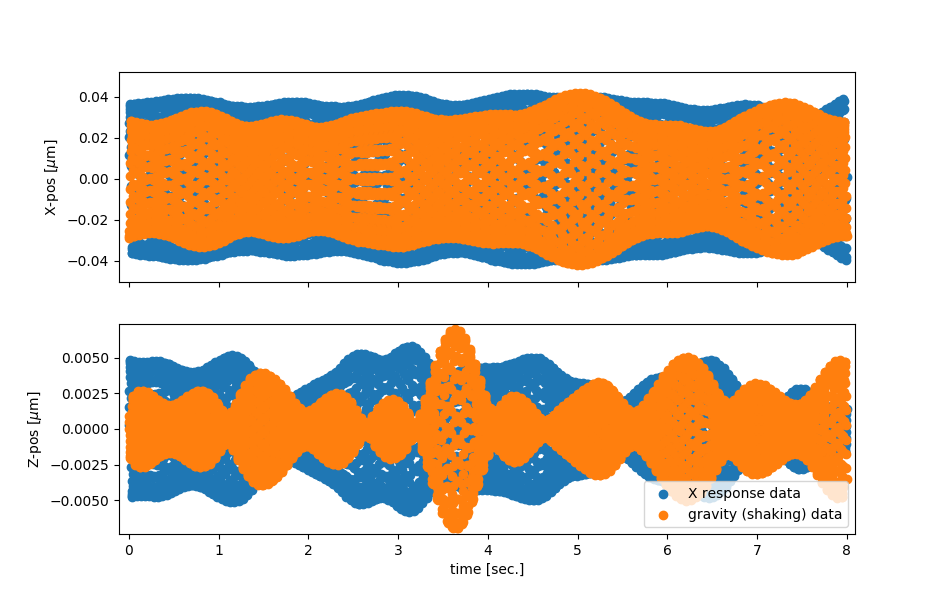

[Text(0, 0.5, 'Z-pos [$\\mu$m]'), Text(0.5, 0, 'time [sec.]')]

In [143]:
_,ax = plt.subplots(2,1,figsize=(9.5,6), sharex=True)
ax[1].scatter(time, data_z/np.max(cal_z)*displacement*1e6, label='X response data')
ax[1].scatter(time, data_z2/np.max(cal_z)*displacement*1e6, label='gravity (shaking) data')
ax[0].scatter(time, data_x/np.max(data_x)*displacement*1e6)
ax[0].scatter(time, data_x2/np.max(data_x)*displacement*1e6)
ax[0].set(ylabel='X-pos [$\mu$m]')
ax[1].legend()
ax[1].set(ylabel='Z-pos [$\mu$m]', xlabel='time [sec.]')